In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import random
from scipy.integrate import odeint


Dynamics of a simple system of equations
$$x' = -x + x^{3}$$
$$y' = -2y$$
    

In [2]:
def X_prime(X,*args): #Exact
    x1 = -X[0] + X[0]**3
    x2 = -2*X[1]
    
    return (x1,x2)

def Jacobean(X):
    J =np.array([[-1 + 3*X[0]**2,0],
                 [0, -2]])
    return J
    

What are the null clines?
$$0 = -x + x^{3}$$ 
$$0 = -2y$$
So we have null clines at $$y=0 ; x=0; x = 1; x = -1$$

Giving us three fixed points: (-1,0), (0,0) and (1,0).
To determine stability, we can look at the Jacobean at each point

In [3]:
for P in [(-1,0), (0,0), (1,0)]:
    J = Jacobean(P)
    e1, e2 = np.linalg.eig(J)[0]
    
    if e1 < 0 and e2 < 0:
        print('The fixed point at {} is a sink'.format(P))
    elif e1 < 0 or e2 < 0:
        print('The fixed point at {} is a saddle'.format(P))
    elif e1 > 0 and e2 > 0:
        print('The fixed point at {} is a source'.format(P))
    

The fixed point at (-1, 0) is a saddle
The fixed point at (0, 0) is a sink
The fixed point at (1, 0) is a saddle


Finally, we can plot some vectors around these fixed points

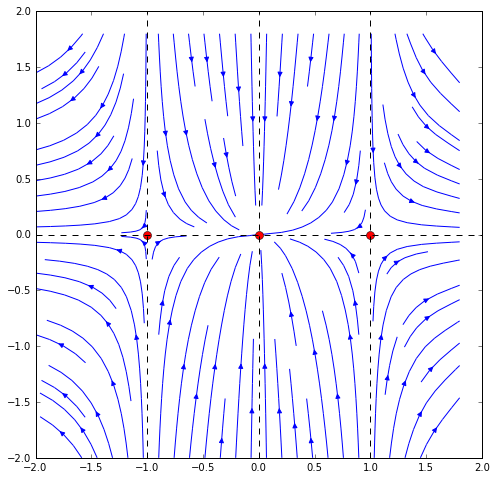

In [4]:
x,y = np.meshgrid(np.arange(-2,2,0.2), np.arange(-2,2,0.2))
U = -x + x**3
V = -2*y
plt.figure(figsize=(8,8))
plt.streamplot(x,y,U,V)
#And the fixed points
plt.plot([-1,0,1], [0,0,0], 'ro', markersize=8)
#And some nullclines, why not
plt.plot([-2,2], [0,0], 'k--') #y = 0
plt.plot([-1,-1], [-2,2], 'k--') #x = -1
plt.plot([0,0], [-2,2], 'k--') #x = 0
plt.plot([1,1], [-2,2], 'k--') #x = 1